In [439]:
## import libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore') #for ignoring warnings

pd.set_option('display.max_columns', None) #display all columns for better view and understanding in-place

In [440]:
#reading the data
loan_df = pd.read_csv("loan.csv")

In [441]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [442]:
loan_df.shape

(39717, 111)

## Data Cleaning 


In [443]:
loan_df.isnull().sum() #get no of null values in each column

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


### Lots of columns with all null values , removing them ....

In [444]:
loan_df.dropna(axis = 1, how = 'all', inplace = True) 

In [445]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [446]:
loan_df.columns[loan_df.nunique() <= 1] #Get single valued columns

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

### There are some single valued columns as well , we need to remove them also ...

In [447]:
loan_df.drop(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'], axis=1, inplace=True)

In [448]:
loan_df.shape

(39717, 48)

### Drop the columns which have no significance to the analysis 

- Some columns are generated post the approval of loan and since we are analyzing the factors contributing to defaulting before approving the loan , we can simply remove these columns.

- Example of post features are delinq_2yrs, revol_bal, out_prncp, total_pymnt, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, chargeoff_within_12_mths, mths_since_last_delinq, mths_since_last_record

- Other columns like member_id, id, title , emp_title, desc, zip_code, addr_state, last_credit_pull_d don't contribute to analysis since they are irrelevant.

- funded_amnt is not needed since we only need the actual amount and same is provide by funded_amnt_inv.

In [449]:
loan_df.drop(['delinq_2yrs', 'revol_bal', 'out_prncp', 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'mths_since_last_delinq', 'mths_since_last_record', 'desc', 'member_id', 'id', 'title', 'emp_title', 'zip_code', 'addr_state', 'url', 'next_pymnt_d', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
'funded_amnt'], axis=1, inplace=True)

In [450]:
loan_df.shape

(39717, 24)

### We are left with 24 columns, let's come to rows analysis now ...

Existing/Current loans data won't contribute to the analysis of whether the new payee will default or not , we need to delete these rows also ..

In [451]:
loan_df.drop(loan_df[loan_df['loan_status'] == 'Current'].index, axis=0, inplace=True)

In [452]:
loan_df.shape
loan_df.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

### Identify the Categorical columns 

In [453]:
data = []
for col in loan_df.columns.tolist():
    data.append({'column': col, 'count': len(loan_df[col].unique())})

In [505]:
unique = pd.DataFrame(data).sort_values('count')
unique.head(20)

,column,count
21,out_prncp_inv,1
2,term,2
12,loan_status,2
10,verification_status,3
23,pub_rec_bankruptcies,4
18,pub_rec,5
8,home_ownership,5
5,grade,7
16,inq_last_6mths,9
7,emp_length,12


### Deriving new columns

In [455]:
loan_df['term_months'] = loan_df['term'].str.rstrip('months')

In [456]:
loan_df['int_rate_percentage'] = loan_df['int_rate'].str.rstrip('%')

In [457]:
loan_df['emp_length_years'] = loan_df['emp_length'].str.rstrip('years ')
loan_df['emp_length_years'].replace({'10+': '10'}, inplace=True)
loan_df['emp_length_years'][loan_df['emp_length_years'] == '< 1'] = '0.5'

In [458]:
loan_df['revol_util_percentage'] = loan_df['revol_util'].str.rstrip('%')

In [459]:
loan_df['issue_d_month'], loan_df['issue_d_year'] = loan_df['issue_d'].str.split('-').str
loan_df['earliest_cr_line_month'], loan_df['earliest_cr_line_year'] = loan_df['earliest_cr_line'].str.split('-').str

In [460]:
loan_df['issue_d_year'] = '20' + loan_df['issue_d_year']

In [504]:
loan_df.issue_d_year.unique()

array(['2011', '2010', '2009', '2008', '2007'], dtype=object)

In [462]:
columns = ['loan_amnt','funded_amnt_inv', 'installment', 'annual_inc', 'emp_length_years', 'dti','out_prncp_inv', 'total_pymnt_inv', 'int_rate_percentage', 'emp_length_years','revol_util_percentage']
for col in columns :
    loan_df[col] = loan_df[col].astype(np.float)

In [463]:
# Creating a profit and loss column
loan_df['Profil_Loss']=(
    loan_df['total_pymnt_inv']-loan_df['funded_amnt_inv']
)*100/loan_df['funded_amnt_inv']

## Outlier Treatment

<AxesSubplot:xlabel='annual_inc'>

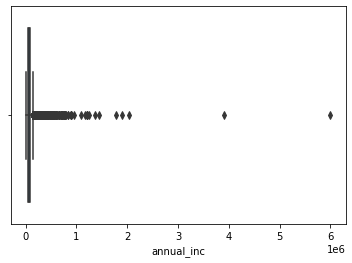

In [464]:
sns.boxplot(loan_df['annual_inc'])

- There are clearly outliers in annual income , we need to treat them
- Check for various quantiles present

In [465]:
quantile_info = loan_df.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info['annual_inc']

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

- The values after 95 percentile are disconnected from other data distribution , only 0-95th percentile data may make sense in this case

In [466]:
per_95_annual_inc = loan_df['annual_inc'].quantile(0.95)
loan_df = loan_df[loan_df.annual_inc <= per_95_annual_inc]

<AxesSubplot:xlabel='annual_inc'>

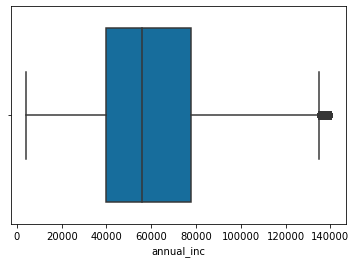

In [467]:
sns.boxplot(loan_df['annual_inc'])

- Annual income column is fixed now

#### Let's analyse other columns 

- dti
- loan_amnt
- funded_amnt_inv

<AxesSubplot:xlabel='dti'>

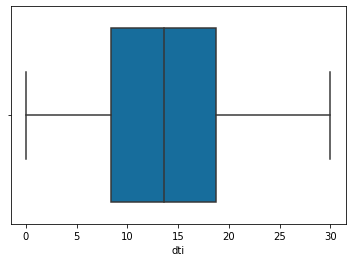

In [468]:
sns.boxplot(loan_df.dti)

<AxesSubplot:xlabel='loan_amnt'>

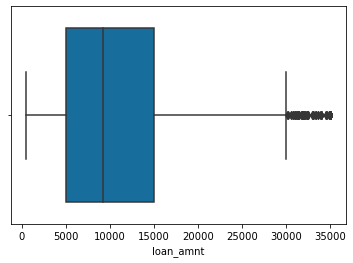

In [469]:
sns.boxplot(loan_df.loan_amnt)

<AxesSubplot:xlabel='funded_amnt_inv'>

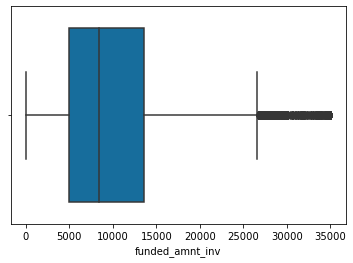

In [470]:
sns.boxplot(loan_df.funded_amnt_inv)

- Though there are some values far from distribution in case of loan_amnt & funded_amnt_inv, the distribution is still contigous and there is no need to remove outliers.

## Univariate Analysis / Categorical Analysis of Data

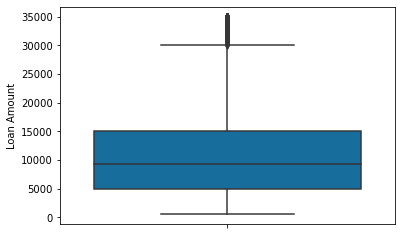

In [471]:
sns.boxplot( y=loan_df["loan_amnt"] )
plt.ylabel('Loan Amount')
plt.show()

<b>Inference</b> : The loan amount varies from 0 to 35,000 having mean of 10,000

#### Since we need to find the parameters that can derive the loan defaulters , let's consider the univariate analysis for loans which have 'Charged Off' loan status

<AxesSubplot:xlabel='loan_status', ylabel='count'>

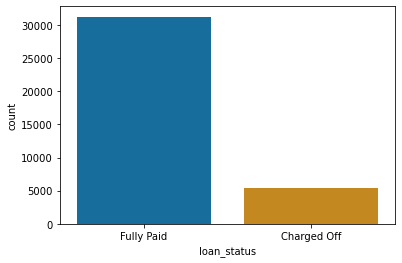

In [472]:
sns.countplot(x = 'loan_status', data = loan_df)

<AxesSubplot:xlabel='grade', ylabel='count'>

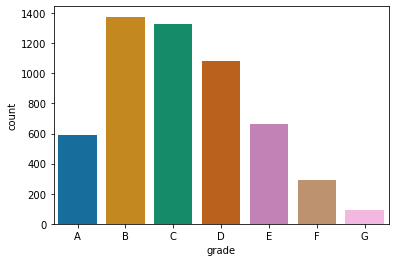

In [473]:
sns.countplot(x = 'grade', data = loan_df[loan_df.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

<AxesSubplot:xlabel='grade', ylabel='count'>

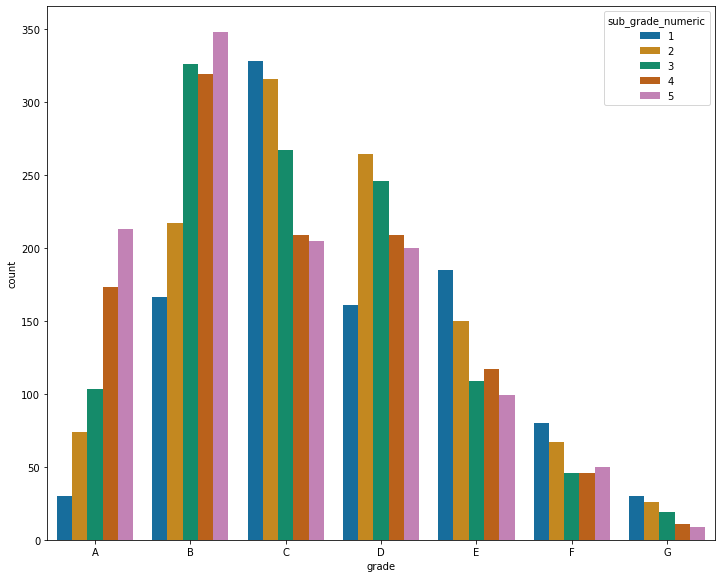

In [474]:
loan_df['sub_grade_numeric'] = pd.to_numeric(loan_df.sub_grade.apply(lambda x : x[-1]))
fig, ax = plt.subplots(figsize=(10,8))
plt.tight_layout()
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade_numeric',data = loan_df[loan_df.loan_status == 'Charged Off'])


#### Home ownership analysis

In [475]:
# unique values for home_ownership
loan_df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

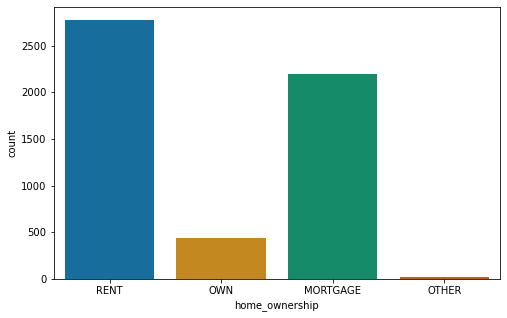

In [476]:
plt.subplots(figsize = (8,5))
#ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=loan_df[loan_df['loan_status']=='Charged Off'])

<b> Inference: </b> : There are more chances of defaulting when the applicant is living in rented house

#### Purpose analysis

<AxesSubplot:xlabel='count', ylabel='purpose'>

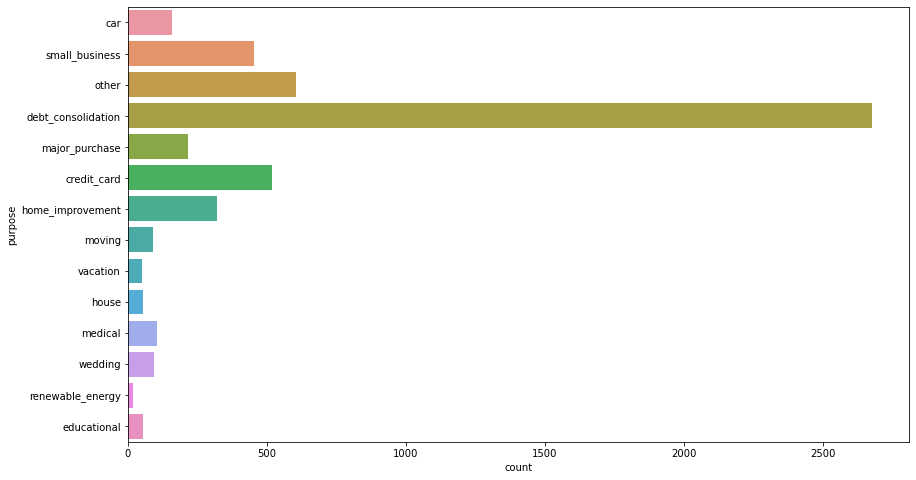

In [477]:
fig, ax = plt.subplots(figsize = (14,8))
sns.countplot(y ='purpose', data=loan_df[loan_df.loan_status == 'Charged Off'])

<b> Inference: </b> : Debt consolidation purpose has highest chances of defaults 

<AxesSubplot:xlabel='count', ylabel='term'>

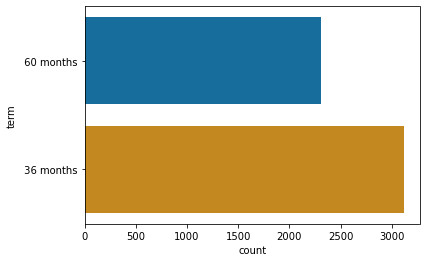

In [478]:
sns.countplot(y='term', data=loan_df[loan_df['loan_status']=='Charged Off'])

<b>Inference</b> : It seems that loans having 36 months term have more defaults

<AxesSubplot:xlabel='verification_status', ylabel='count'>

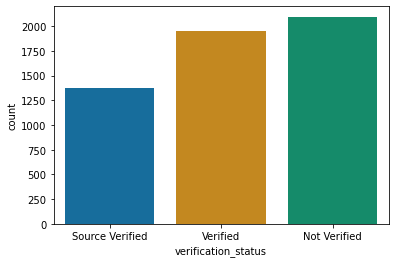

In [479]:
sns.countplot(x='verification_status', data=loan_df[loan_df['loan_status']=='Charged Off'])

<b>Inference</b> : Loans which has source verified have lesser number of defaults

<AxesSubplot:xlabel='inq_last_6mths', ylabel='count'>

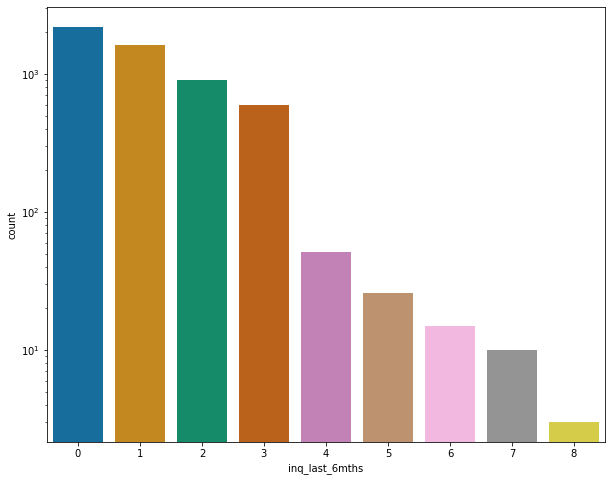

In [480]:
fig,ax = plt.subplots(figsize = (10,8))
ax.set_yscale('log')
sns.countplot(x='inq_last_6mths', data=loan_df[loan_df['loan_status']=='Charged Off'])

#### Analyzing by issued month and year

In [481]:
loan_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,out_prncp_inv,total_pymnt_inv,pub_rec_bankruptcies,term_months,int_rate_percentage,emp_length_years,revol_util_percentage,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,Profil_Loss,sub_grade_numeric
0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9,0.0,5833.84,0.0,36,10.65,10.0,83.7,Dec,2011,Jan,85,17.263116,2
1,2500.0,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4,0.0,1008.71,0.0,60,15.27,0.5,9.4,Dec,2011,Apr,99,-59.651600,4
2,2400.0,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10,0.0,3005.67,0.0,36,15.96,10.0,98.5,Dec,2011,Nov,01,25.236250,5
3,10000.0,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37,0.0,12231.89,0.0,36,13.49,10.0,21.0,Dec,2011,Feb,96,22.318900,1
5,5000.0,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.30%,12,0.0,5632.21,0.0,36,7.90,3.0,28.3,Dec,2011,Nov,04,12.644200,4


<AxesSubplot:xlabel='issue_d_year', ylabel='count'>

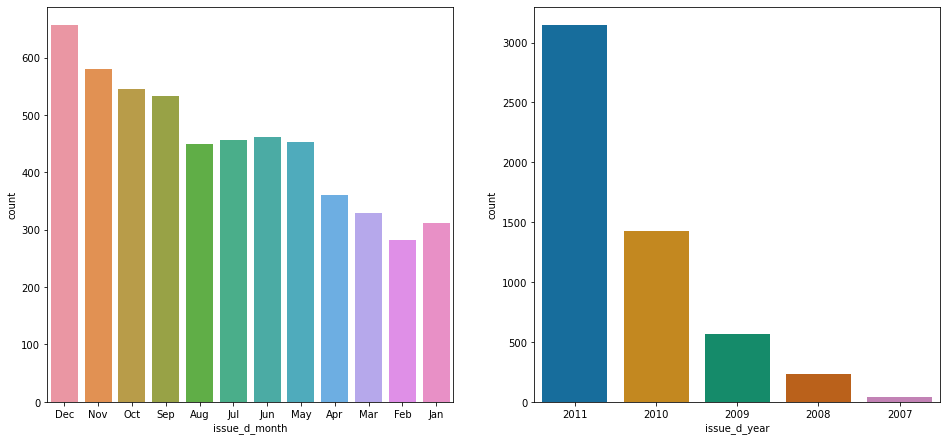

In [482]:
plt.figure(figsize=(16,16))
plt.subplot(221)
sns.countplot(x='issue_d_month', data=loan_df[loan_df['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_d_year', data=loan_df[loan_df['loan_status']=='Charged Off'])

<b>Inference: </b>Maximum number of defaults have occured when the loan was sanctioned in Dec. Defaults for loans issued in the year 2011 were also high as compared to other years


#### Analyzing installment,dti, loan_amnt

In [483]:
loan_df['installment_groups'] = pd.cut(loan_df['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
loan_df['funded_amnt_inv_group'] = pd.cut(loan_df['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan_df['loan_amnt_groups'] = pd.cut(loan_df['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan_df['dti_groups'] = pd.cut(loan_df['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

<AxesSubplot:xlabel='funded_amnt_inv_group', ylabel='count'>

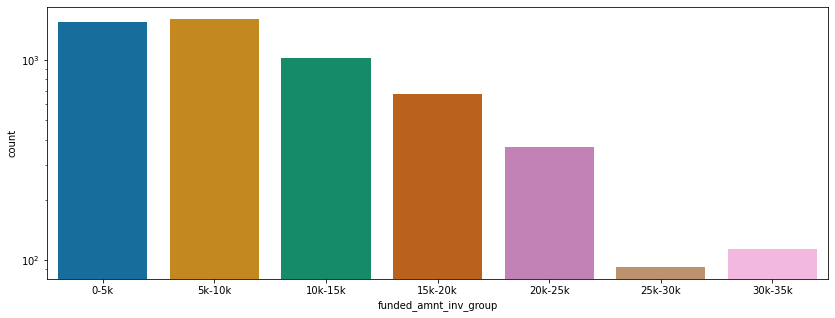

In [484]:
fig,ax = plt.subplots(figsize = (14,5))
ax.set_yscale('log')
sns.countplot(x='funded_amnt_inv_group', data=loan_df[loan_df['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='loan_amnt_groups', ylabel='count'>

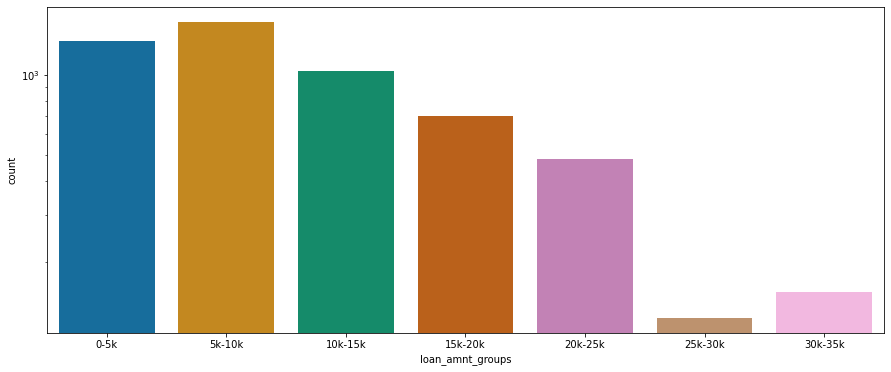

In [485]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='loan_amnt_groups', data=loan_df[loan_df['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='dti_groups', ylabel='count'>

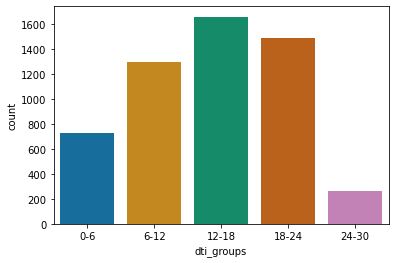

In [486]:
sns.countplot(x='dti_groups', data=loan_df[loan_df['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='installment_groups', ylabel='count'>

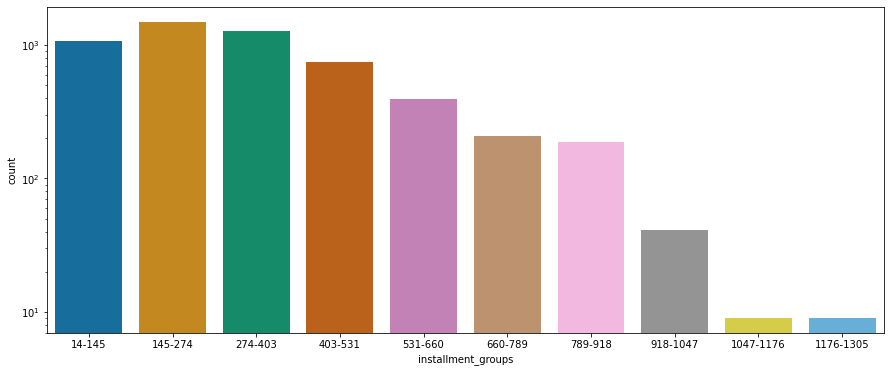

In [487]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='installment_groups', data=loan_df[loan_df['loan_status']=='Charged Off'])

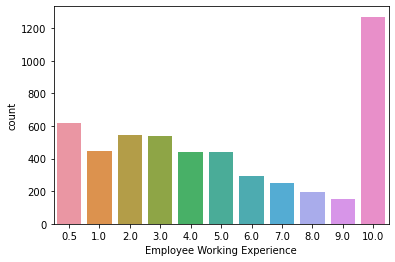

In [488]:
sns.countplot(x='emp_length_years', data=loan_df[loan_df['loan_status'] == 'Charged Off'])
plt.xlabel('Employee Working Experience')
plt.show()

<b> Inference </b> : Employees with 10 or more years of experience have more chances of defaulting...

In [489]:
loan_df['int_rate_groups'] = pd.cut(loan_df['int_rate_percentage'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])

Text(0.5, 0, 'Interest Rate')

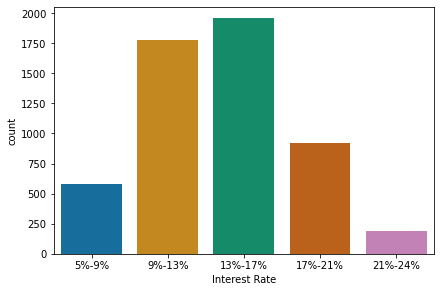

In [490]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='int_rate_groups', data=loan_df[loan_df.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')

<b> Inference: </b> Loans with interest rate 13-17% have highest number of defaults.

In [491]:
loan_df['annual_inc_groups'] = pd.cut(loan_df['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

<AxesSubplot:xlabel='annual_inc_groups', ylabel='count'>

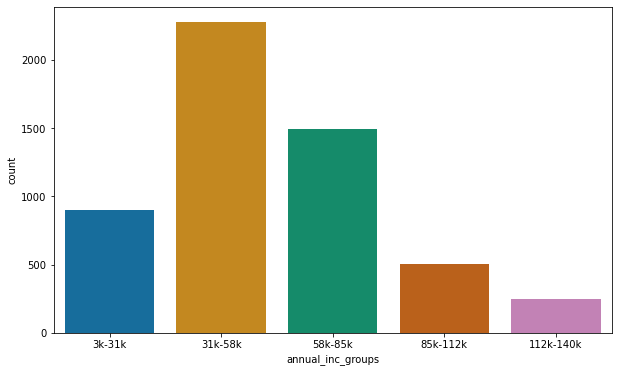

In [492]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x='annual_inc_groups', data=loan_df[loan_df.loan_status == 'Charged Off'])

<b>Inference: </b> Applicants who have an income of range 31201 - 58402 have higher chance of defaulting

### Cumulative Observations

#### With above plots, we noticed that there are more chances of defaulting when :

- Applicants having house_ownership as 'RENT'
- Applicants who receive interest at the rate of 13-17%
- Applicants who have an income of range 31201 - 58402
- Applicants with employement length of 10 or more
- When funded amount by investor is between 5000-10000
- Loan amount is between 5429 - 10357
- Dti is between 12-18
- When monthly installments are between 145-274
- Term of 36 months
- When the loan status is Not verified
- When the no of enquiries in last 6 months is 0
- When the purpose is 'debt_consolidation'
- Grade is 'B'
- And a total grade of 'B5' level.

### Annual Income vs other columns analysis 

#### Plot of annual income vs purpose

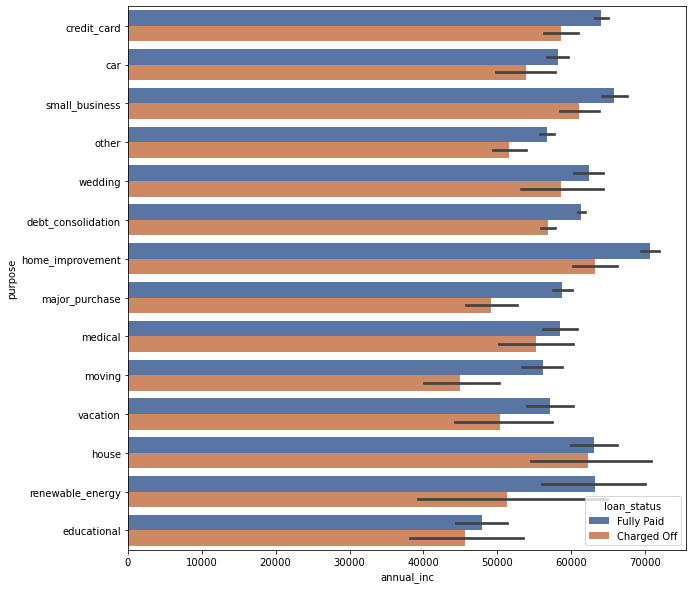

In [493]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show()

debt_consolidation had highest number of default as seen earlier but the annual income is not highest in that case , instead it
is highest in case of home_improvement purpose

Applicants with higher salary mostly applied loans for "home_improvment", "house", "renewable_energy" and "small_businesses"

#### Plot for Annual income vs home ownership

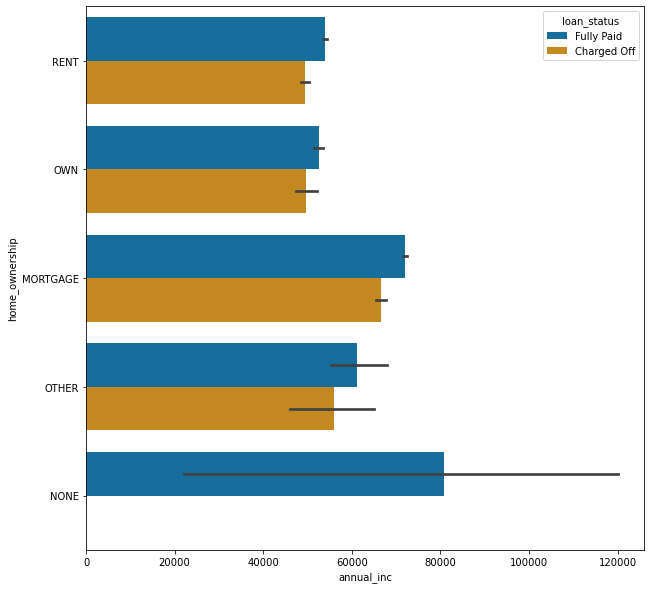

In [494]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df,x='annual_inc', y='home_ownership', hue ='loan_status')
plt.show()

Nothing substantial could be drawn in this case however in all the categories fully paid loan are more than defaults/charged_off loans

#### Annual Income vs Loan amount

<AxesSubplot:xlabel='annual_inc_groups', ylabel='loan_amnt'>

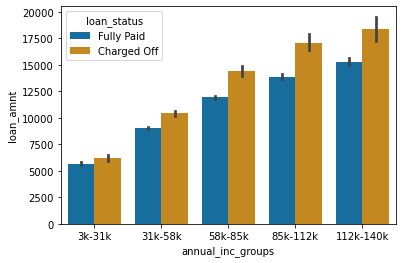

In [495]:
sns.barplot(x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status', data = loan_df)

<b> Inference: </b> The loan_amount is higher for people who defaulted among all income groups ...


#### Annual income vs int_rate

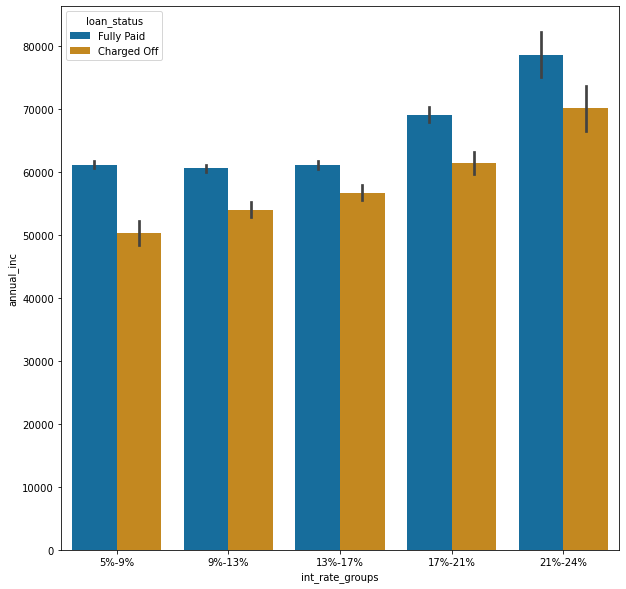

In [496]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df,x='int_rate_groups', y='annual_inc', hue ='loan_status')
plt.show()

### Loan Amount vs other column analysis 

#### Plot for Loan Amount vs Loan Purpose

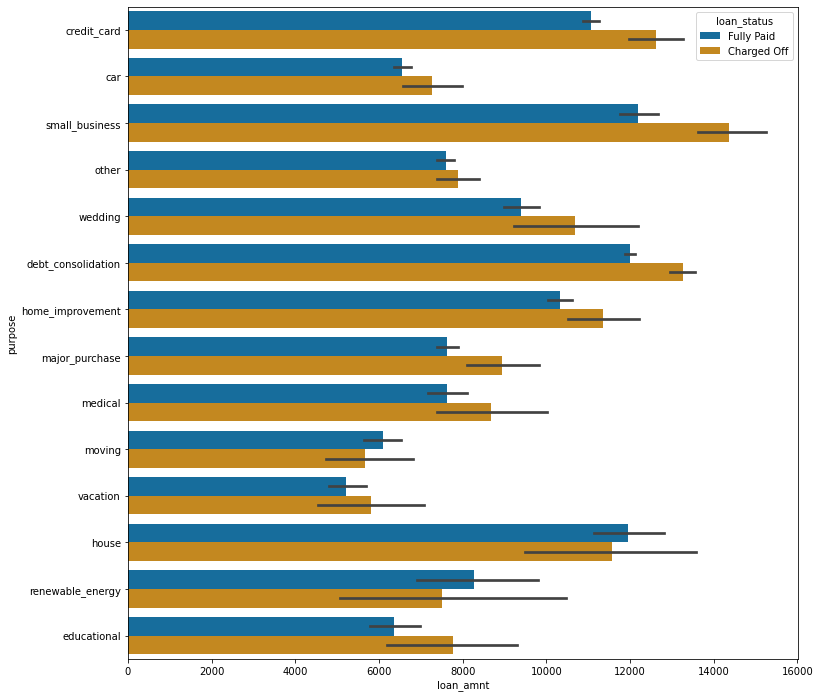

In [497]:
plt.figure(figsize=(12,12))
sns.barplot(data =loan_df,x='loan_amnt', y='purpose', hue ='loan_status')
plt.show()

#### Plot for loan vs house ownership

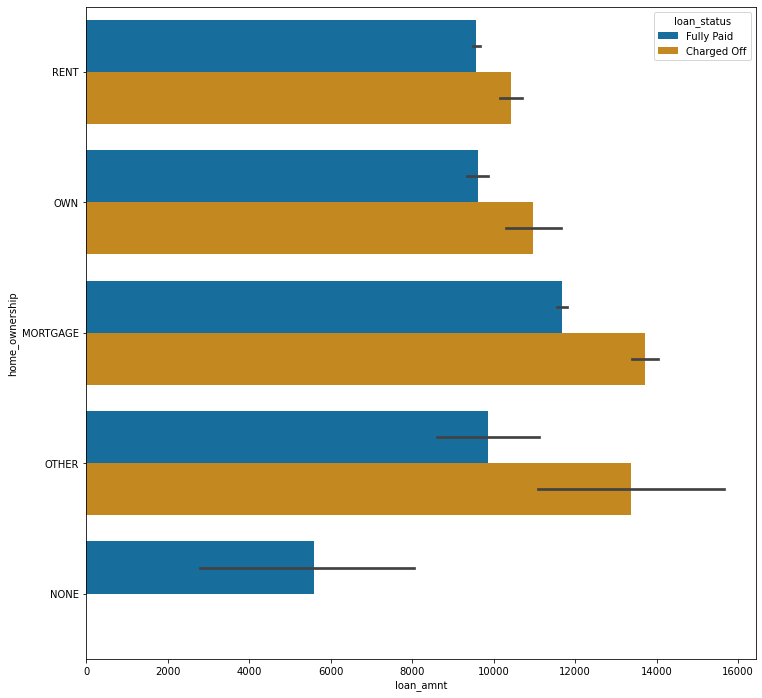

In [498]:
plt.figure(figsize=(12,12))
sns.barplot(data =loan_df,x='loan_amnt', y='home_ownership', hue ='loan_status')
plt.show()

#### Plot for Loan amount vs Grade

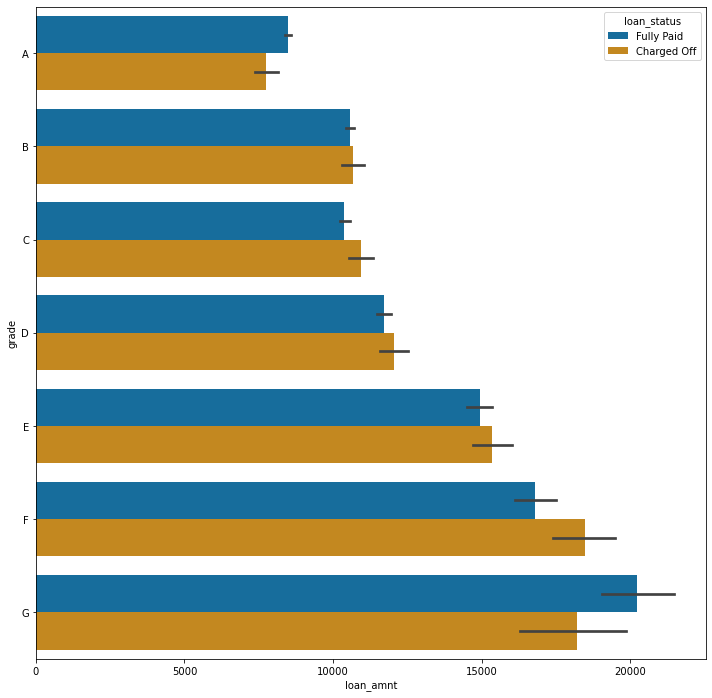

In [499]:
plt.figure(figsize=(12,12))
sns.barplot(data =loan_df,x='loan_amnt', y='grade', hue ='loan_status', order=['A','B','C','D','E','F','G'])
plt.show()

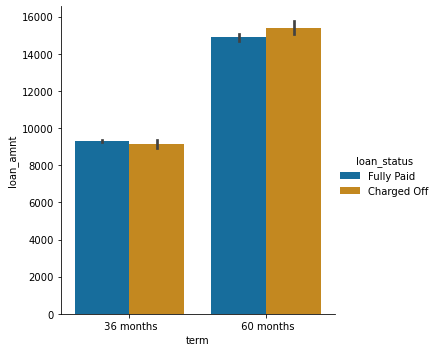

In [500]:
sns.catplot(x = 'term', y = 'loan_amnt', data = loan_df, hue = 'loan_status', kind = 'bar')

<b> Inference: </b> Applicants who applied and defaulted have no significant difference in loan_amounts.

#### grade vs interest rate

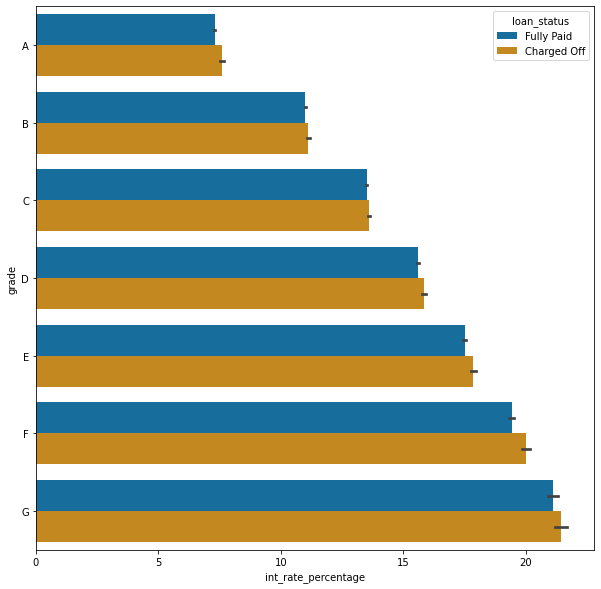

In [501]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df,x='int_rate_percentage', y='grade', hue ='loan_status', order=['A','B','C','D','E','F','G'])
plt.show()

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0-5k'),
  Text(1, 0, '5k-10k'),
  Text(2, 0, '10k-15k'),
  Text(3, 0, '15k-20k'),
  Text(4, 0, '20k-25k'),
  Text(5, 0, '25k-30k'),
  Text(6, 0, '30k-35k')])

<Figure size 432x288 with 0 Axes>

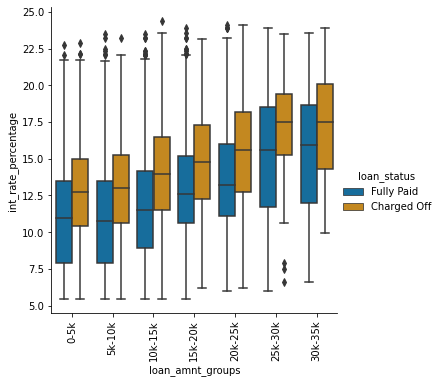

In [502]:
plt.tight_layout()
sns.catplot(data =loan_df,y ='int_rate_percentage', x ='loan_amnt_groups', hue ='loan_status',kind = 'box')
plt.xticks(rotation=90)

<b> Inference: </b> We can see that the interest rate for charged off loans is pretty high than that of fully paid loans in all the loan_amount groups which can be strong driving factor for loan defaulting

<AxesSubplot:xlabel='verification_status', ylabel='loan_amnt'>

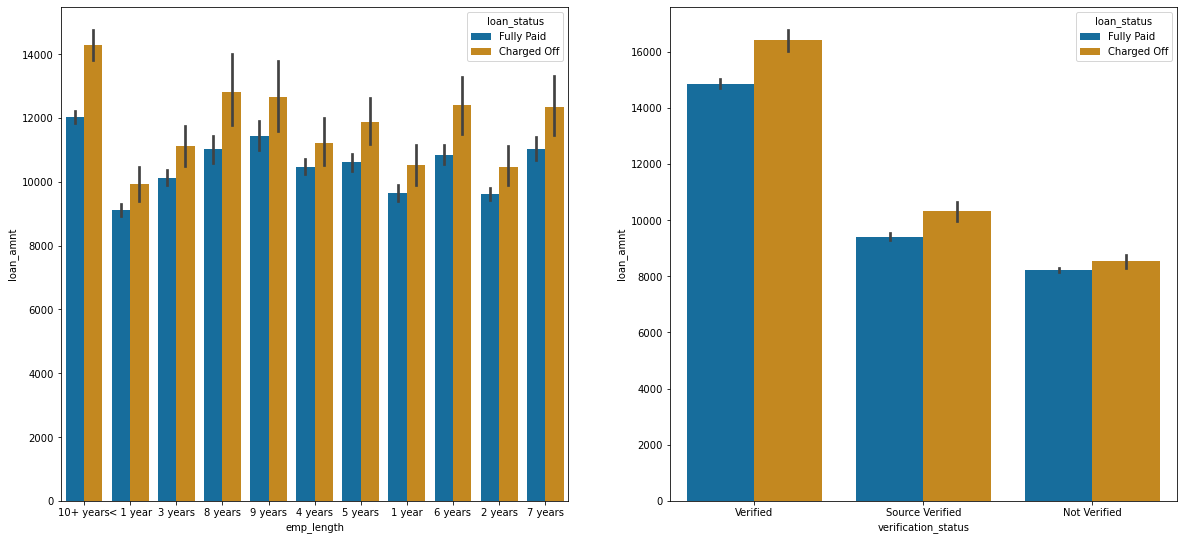

In [503]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data =loan_df,y='loan_amnt', x='emp_length', hue ='loan_status')
plt.subplot(222)
sns.barplot(data =loan_df,y='loan_amnt', x='verification_status', hue ='loan_status')

### Cumulative Observations

With the above plot and analysis of charged off loans.We noticed that the applicant has higher chances of defaulting when :

- Applicants taking loan for 'home improvement' and have income of 60k -70k
- Applicants whose home ownership is 'MORTGAGE and have income of 60-70k
- Applicants who receive interest at the rate of 21-24% and have an income of 70k-80k
- Applicants who have taken a loan in the range 30k - 35k and are charged interest rate of 15-17.5 %
- Applicants who have taken a loan for small business and the loan amount is greater than 14k
- Applicants whose home ownership is 'MORTGAGE and have loan of 14-16k
- When grade is F and loan amount is between 15k-20k
- For grade G and interest rate above 20%
- When the loan is verified and loan amount is above 16k